### Artificial Neural Networks - With Digits of MNIST Dataset

In [1]:
#Basic Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

#Deep Learning Libraries 
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Flatten,Activation,Dropout
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from keras import optimizers
import tensorflow as tf
from tensorflow.keras import layers

#Evoluation Libraries 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

#Visualization Liraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

In [2]:
from keras.datasets import mnist                  #Digit mnist inbuilt Dataset Load

In [3]:
#(x_train_digit,y_train_digit),(x_test_digit,y_test_digit) = mnist.load_data()
# Or
train,test = mnist.load_data()
x_train_digit,y_train_digit = train
x_test_digit,y_test_digit = test

In [4]:
y_train_digit[0]

5

In [5]:
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

<function matplotlib.pyplot.show(close=None, block=None)>

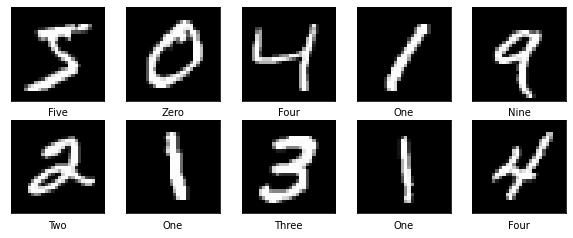

In [6]:
# Names of numbers in the dataset order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

# Visualizing the digits
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_digit[i], cmap='gray')
    plt.xlabel(col_names[y_train_digit[i]])
plt.show

In [7]:
x_train_digit.ndim

3

In [8]:
print(x_train_digit.shape)
print(x_test_digit.shape)

(60000, 28, 28)
(10000, 28, 28)


In [9]:
x_train_digit = x_train_digit.reshape(60000,784)
x_test_digit = x_test_digit.reshape(10000,784)

In [10]:
print(x_train_digit.shape)
print(x_test_digit.shape)

(60000, 784)
(10000, 784)


In [11]:
x_train_digit.ndim

2

In [12]:
# Encoding Digit MNISt Labels
y_train_digit = to_categorical( y_train_digit,num_classes=10)

y_test_digit = to_categorical( y_test_digit,num_classes=10)

In [13]:
 y_train_digit

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [14]:
# Creating base neural network
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(10, activation='sigmoid'),
    
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 24)                3096      
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 24)               96        
 hNormalization)                                        

In [16]:
#https://keras.io/api/losses/probabilistic_losses/#sparsecategoricalcrossentropy-class

In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [18]:
history=model.fit(x_train_digit,y_train_digit,batch_size=100,epochs=10,validation_data=(x_test_digit,y_test_digit))  

Epoch 1/10
600/600 [==============================] - 5s 5ms/step - loss: 1.0113 - accuracy: 0.6836 - val_loss: 0.2362 - val_accuracy: 0.9406
Epoch 2/10
600/600 [==============================] - 3s 5ms/step - loss: 0.5107 - accuracy: 0.8510 - val_loss: 0.1674 - val_accuracy: 0.9529
Epoch 3/10
600/600 [==============================] - 3s 5ms/step - loss: 0.4071 - accuracy: 0.8848 - val_loss: 0.1464 - val_accuracy: 0.9599
Epoch 4/10
600/600 [==============================] - 3s 5ms/step - loss: 0.3566 - accuracy: 0.9003 - val_loss: 0.1315 - val_accuracy: 0.9641
Epoch 5/10
600/600 [==============================] - 3s 5ms/step - loss: 0.3219 - accuracy: 0.9107 - val_loss: 0.1276 - val_accuracy: 0.9651
Epoch 6/10
600/600 [==============================] - 3s 5ms/step - loss: 0.2999 - accuracy: 0.9176 - val_loss: 0.1151 - val_accuracy: 0.9676
Epoch 7/10
600/600 [==============================] - 3s 5ms/step - loss: 0.2822 - accuracy: 0.9217 - val_loss: 0.1050 - val_accuracy: 0.9724
Epoch 

In [19]:
test_loss_digit, test_acc_digit = model.evaluate(x_test_digit, y_test_digit)

313/313 [==============================] - 1s 2ms/step - loss: 0.1019 - accuracy: 0.9722


In [20]:
test_loss_digit

0.10193467885255814

In [21]:
#Predicting the lables-DIGIT
y_predict = model.predict(x_test_digit)

313/313 [==============================] - 1s 2ms/step


In [22]:
y_predict

array([[5.7869289e-02, 5.1126495e-02, 5.9333122e-01, ..., 9.9996573e-01,
        2.2161897e-02, 5.8156532e-01],
       [1.3747740e-01, 3.4045708e-01, 9.9995589e-01, ..., 2.8621739e-01,
        4.3798524e-01, 2.8842387e-03],
       [1.6400127e-01, 9.9969196e-01, 7.6262879e-01, ..., 8.4277278e-01,
        5.9327197e-01, 4.2020309e-01],
       ...,
       [2.8793141e-02, 8.8396855e-03, 4.3578911e-01, ..., 4.0537840e-01,
        3.8464043e-02, 9.3227607e-01],
       [3.2749316e-01, 4.9316719e-02, 4.3854929e-04, ..., 1.3411045e-03,
        7.3853654e-01, 3.3950555e-01],
       [3.1938833e-01, 6.5437052e-05, 6.4061648e-01, ..., 6.7338621e-04,
        7.6823688e-01, 3.1064160e-04]], dtype=float32)

In [23]:
y_predict[0]

array([0.05786929, 0.0511265 , 0.5933312 , 0.26585543, 0.17130509,
       0.00397166, 0.01397306, 0.9999657 , 0.0221619 , 0.5815653 ],
      dtype=float32)

In [24]:
y_test_digit.shape

(10000, 10)

In [25]:
y_predicts = np.argmax(y_predict,axis=1)   #Here we get the index of maximum value in the encoded vector,  #Predicted Answer
y_test_digit_eval=np.argmax(y_test_digit, axis=1)    # Actual Answer

In [26]:
y_predicts

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [27]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [28]:
y_pre=pd.DataFrame(y_predicts)

In [29]:
y_pre.head()

,0
0,7
1,2
2,1
3,0
4,4


In [30]:
y_predicts.shape

(10000,)

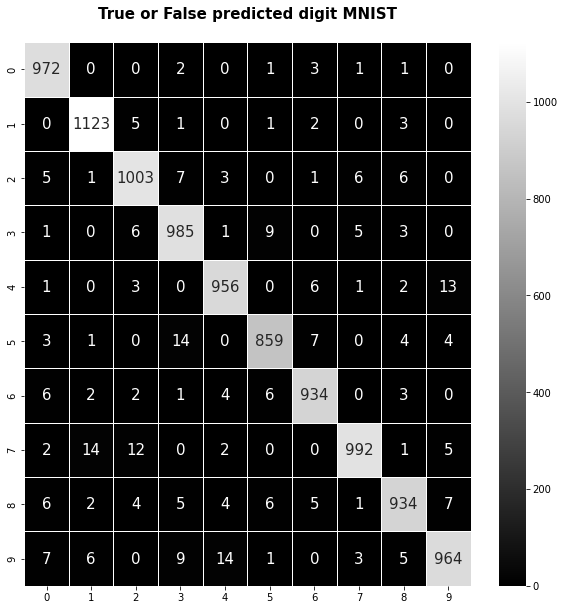

In [31]:
#Confusion Matrix for DIGIT Mnsit
con_mat=confusion_matrix(y_test_digit_eval,y_predicts)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt='d',cmap='gray')
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test_digit_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.96      0.97       892
           6       0.97      0.97      0.97       958
           7       0.98      0.96      0.97      1028
           8       0.97      0.96      0.96       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [33]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


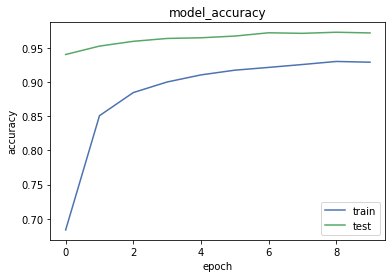

In [34]:
#Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='best')
plt.show()

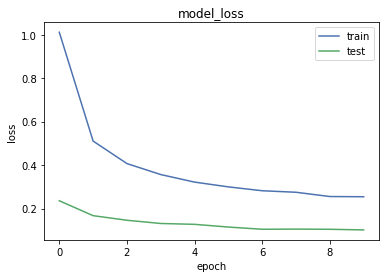

In [35]:
#Summarize history for Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='best')
plt.show()

In [36]:
y_pre.tail()

,0
9995,2
9996,3
9997,4
9998,5
9999,6



Enter Test Sets Row Numbers Between 0-9999: 9997

For the Row of 9997 The Array format of Test digit is: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]

Order of Digits for Array(0-9) is: [Zero, One, Two, Three, Four, Five, Six, Seven, Eight, Nine]



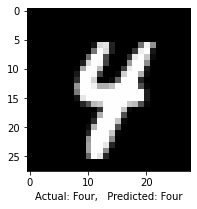

In [37]:
#Testing the Digits

ui=int(input("\nEnter Test Sets Row Numbers Between 0-9999: "))

plt.figure(figsize=(3,3))
plt.imshow(x_test_digit[ui].reshape(28,28), cmap='gray')

plt.xlabel('Actual: {},   Predicted: {}'.format(col_names[y_test_digit_eval[ui]],col_names[y_predicts[ui]]))
plt.show

print('\nFor the Row of {}'.format(ui) + ' The Array format of Test digit is: {}'.format(y_test_digit[ui]) + '\n\nOrder of Digits for Array(0-9) is: [Zero, One, Two, Three, Four, Five, Six, Seven, Eight, Nine]\n')